<a href="https://colab.research.google.com/github/siddhi1991/GIS-programming/blob/main/book/labs/lab_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 6

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/giswqs/geog-312/blob/main/book/labs/lab_06.ipynb)

## Overview

In this lab, you will practice handling multi-dimensional geospatial datasets using `Xarray` and `Rioxarray`. This includes working with NetCDF climate data and georeferenced raster datasets (GeoTIFF files). You will learn how to perform data selection, arithmetic operations, resampling, and reprojection, as well as saving your results back to disk.

By the end of this lab, you will have a better understanding of how to:

* Work with Xarray datasets (NetCDF format) and inspect geospatial raster data.
* Apply common data operations like slicing, resampling, and arithmetic analysis.
* Reproject, clip, mask, and resample raster datasets.
* Export processed data to various formats such as NetCDF and GeoTIFF.

## Exercise 1: Exploring the Sea Surface Temperature Dataset

1. **Load the sea surface temperature dataset** from the NetCDF file ([`sea_surface_temperature.nc`](https://github.com/opengeos/datasets/releases/download/netcdf/sea_surface_temperature.nc)).
2. **Inspect the `Dataset` object** and list all the available variables and dimensions in the dataset.
3. **Select the `sst` variable** (sea surface temperature).
4. **Print the attributes, dimensions, and coordinates** of the `sst` variable to understand the metadata.

This exercise allows you to practice selecting specific subsets of data and visualizing SST patterns over a specified period.

In [ ]:
%pip install xarray pooch

import xarray as xr

url = "https://github.com/opengeos/datasets/releases/download/netcdf/sea_surface_temperature.nc"
ds = xr.open_dataset(url)
ds
sst = ds.sst
sst
sst.attrs
sst.dims
sst.coords

/usr/local/lib/python3.11/dist-packages/xarray/conventions.py:193: SerializationWarning: variable 'sst' has multiple fill values {-999000000.0, -9999.0} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)


Coordinates:
  * lon      (lon) float64 6kB 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8
  * lat      (lat) float64 3kB -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * time     (time) datetime64[ns] 576B 2010-01-01 2010-02-01 ... 2015-12-01

## Exercise 2: Data Selection and Indexing

1. **Select a subset of the `sst` data** for a specific time (`2010-07-01`) and latitude (`0.0`), which represents the Equator.
2. **Create a time slice** for the SST data between January and March 2010 for all latitudes and longitudes.
3. **Plot the time slice** as a line plot, showing the latitude-averaged SST over time.

This exercise allows you to practice selecting specific subsets of data and visualizing SST patterns over a specified period.

/usr/local/lib/python3.11/dist-packages/xarray/conventions.py:193: SerializationWarning: variable 'sst' has multiple fill values {-999000000.0, -9999.0} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)


(array([126213.,  45110.,  32739.,  26451.,  25572.,  28301.,  37049.,
         45587.,  82495.,  66762.]),
 array([271.29901123, 274.62811279, 277.95721436, 281.28631592,
        284.61541748, 287.94451904, 291.27362061, 294.60272217,
        297.93182373, 301.26092529, 304.59002686]),
 <BarContainer object of 10 artists>)

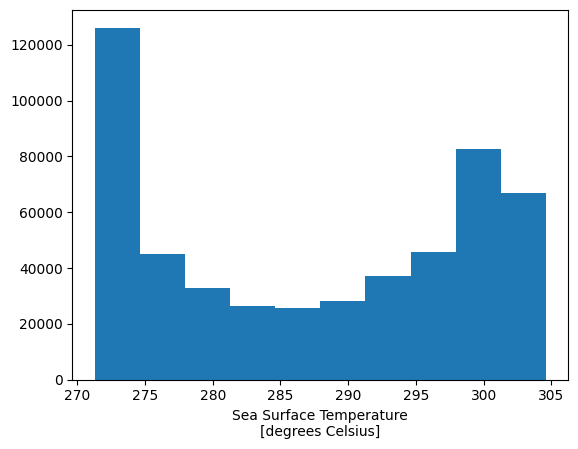

In [ ]:
%pip install xarray pooch

import xarray as xr

url = "https://github.com/opengeos/datasets/releases/download/netcdf/sea_surface_temperature.nc"
ds = xr.open_dataset(url)
ds
sst = ds.sst
sst
subset = sst.sel(time = "2010-07-01", lat = 0.0, method = "nearest")
subset
subset = sst.sel(time = slice("2010-01-01", "2010-03-31"))
subset
subset.plot()

## Exercise 3: Performing Arithmetic Operations

1. **Compute the mean SST** over the entire time range (2010-2015) to obtain the average sea surface temperature for each spatial location.
2. **Calculate the temperature anomalies** by subtracting the computed mean from the original SST values. This helps understand how SST deviates from the mean during the time period.
3. **Plot both the mean SST and the anomalies** on separate plots to visualize spatial temperature patterns and deviations. You can select a specific time to display the anomalies.

This exercise introduces arithmetic operations on the dataset, focusing on the concept of temperature anomalies.

/usr/local/lib/python3.11/dist-packages/xarray/conventions.py:193: SerializationWarning: variable 'sst' has multiple fill values {-999000000.0, -9999.0} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)


(array([4.930000e+02, 5.977000e+03, 5.824400e+04, 8.917880e+05,
        7.524055e+06, 3.411671e+06, 4.201870e+05, 6.716500e+04,
        1.071200e+04, 4.040000e+02]),
 array([-14.01995129, -11.10733744,  -8.1947236 ,  -5.28210975,
         -2.3694959 ,   0.54311795,   3.45573179,   6.36834564,
          9.28095949,  12.19357334,  15.10618718]),
 <BarContainer object of 10 artists>)

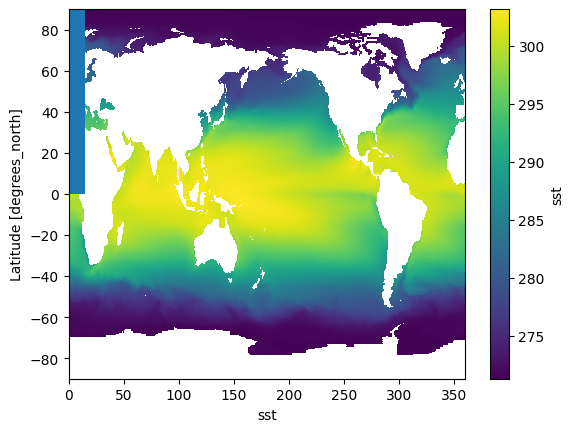

In [ ]:
%pip install xarray pooch
import xarray as xr

url = "https://github.com/opengeos/datasets/releases/download/netcdf/sea_surface_temperature.nc"
ds = xr.open_dataset(url)
sst= ds.sst
mean_SST= sst.mean(dim = "time")
mean_SST
temperature_anomalies = sst - mean_SST
temperature_anomalies
mean_SST.plot()
temperature_anomalies.plot()

## Exercise 4: GroupBy and Resampling

1. **Use `groupby` to calculate the seasonal mean SST**. Group the data by season (`DJF`, `MAM`, `JJA`, and `SON`) and compute the average SST for each season.
2. **Resample the dataset to compute the monthly mean SST**. This aggregates the data on a monthly basis.
3. **Plot the seasonal mean SST and the monthly mean SST** to visualize how sea surface temperature varies by season and by month.

This exercise demonstrates how to group and resample time-series data, commonly used in climate data analysis.

/usr/local/lib/python3.11/dist-packages/xarray/conventions.py:193: SerializationWarning: variable 'sst' has multiple fill values {-999000000.0, -9999.0} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)
/usr/local/lib/python3.11/dist-packages/xarray/groupers.py:487: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(


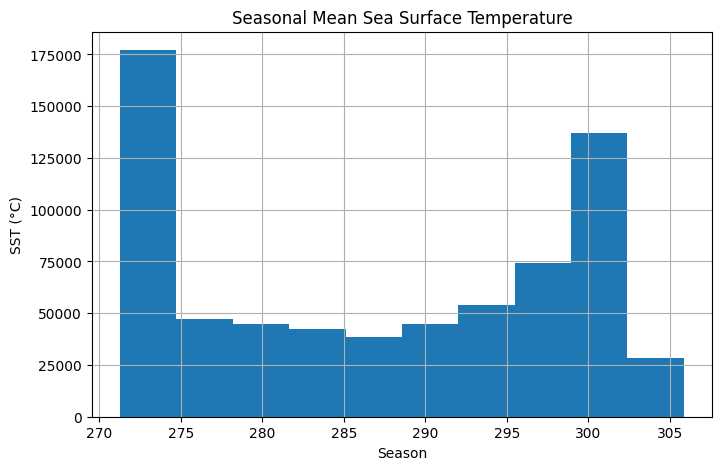

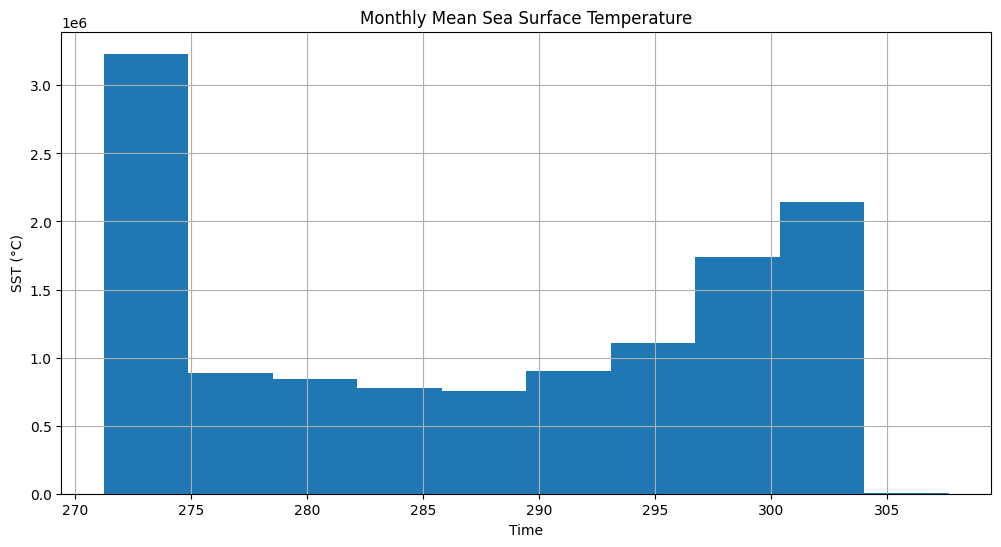

In [ ]:
%pip install xarray pooch

import xarray as xr
import matplotlib.pyplot as plt

url= "https://github.com/opengeos/datasets/releases/download/netcdf/sea_surface_temperature.nc"
ds= xr.open_dataset(url)
sst= ds.sst
seasonal_meansst = ds.sst.groupby("time.season").mean()
seasonal_meansst
monthly_meansst = ds.sst.resample(time = "M").mean()
monthly_meansst

plt.figure(figsize=(8, 5))
seasonal_meansst.plot()
plt.title("Seasonal Mean Sea Surface Temperature")
plt.ylabel("SST (°C)")
plt.xlabel("Season")
plt.grid(True)
plt.show()


plt.figure(figsize=(12, 6))
monthly_meansst.plot()
plt.title("Monthly Mean Sea Surface Temperature")
plt.ylabel("SST (°C)")
plt.xlabel("Time")
plt.grid(True)
plt.show()


## Exercise 5: Writing Data to NetCDF

1. **Select the SST anomalies** calculated in Exercise 3 for further analysis and export.
2. **Convert the `sst` variable to `float32`** to optimize file size before writing the data to a NetCDF file.
3. **Write the anomalies data** to a new NetCDF file named `sst_anomalies.nc` for storage and future use.
4. **Load the saved NetCDF file** back into memory and print its contents to verify the saved data.

This exercise teaches how to export processed geospatial data to NetCDF, a widely-used file format in climate data analysis.

In [ ]:
%pip install xarray pooch
import xarray as xr

url = "https://github.com/opengeos/datasets/releases/download/netcdf/sea_surface_temperature.nc"
ds = xr.open_dataset(url)
ds
sst= ds.sst
sst
mean_SST= sst.mean(dim = "time")
mean_SST
temperature_anomalies = sst - mean_SST
temperature_anomalies

ds["sst"] = ds["sst"].astype("float32")

ds.to_netcdf("temperature_anomalies.nc")
loaded_data = xr.open_dataset("temperature_anomalies.nc")
loaded_data


/usr/local/lib/python3.11/dist-packages/xarray/conventions.py:193: SerializationWarning: variable 'sst' has multiple fill values {-999000000.0, -9999.0} defined, decoding all values to NaN.
  var = coder.decode(var, name=name)


<xarray.Dataset> Size: 75MB
Dimensions:  (lon: 720, lat: 360, time: 72)
Coordinates:
  * lon      (lon) float64 6kB 0.25 0.75 1.25 1.75 ... 358.2 358.8 359.2 359.8
  * lat      (lat) float64 3kB -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * time     (time) datetime64[ns] 576B 2010-01-01 2010-02-01 ... 2015-12-01
Data variables:
    sst      (time, lat, lon) float32 75MB ...

## Exercise 6: Load and Inspect a Raster Dataset

1. Use `rioxarray` to load the GeoTIFF raster file at https://github.com/opengeos/datasets/releases/download/raster/Libya-2023-09-13.tif.
2. Inspect the dataset by printing its dimensions, coordinates, and attributes.
3. Check and print the CRS and affine transformation of the dataset.

In [ ]:
%pip install rioxarray

import rioxarray

url = " https://github.com/opengeos/datasets/releases/download/raster/Libya-2023-09-13.tif"
load_ds = rioxarray.open_rasterio(url)
load_ds
load_ds.dims
load_ds.coords
load_ds.attrs
load_ds.rio.crs
load_ds.rio.transform
load_ds

<xarray.DataArray (band: 3, y: 17408, x: 17408)> Size: 909MB
[909115392 values with dtype=uint8]
Coordinates:
  * band         (band) int64 24B 1 2 3
  * x            (x) float64 139kB 6.498e+05 6.498e+05 ... 6.552e+05 6.552e+05
  * y            (y) float64 139kB 3.63e+06 3.63e+06 ... 3.625e+06 3.625e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

## Exercise 7: Reproject the Raster to a New CRS

1. Reproject the loaded raster dataset from its original CRS to EPSG:4326 (WGS84).
2. Print the new CRS and check the dimensions and coordinates of the reprojected data.
3. Plot the original and reprojected datasets for comparison.

EPSG:4326


(array([3.45165420e+07, 5.59760640e+07, 1.72675701e+08, 2.06664071e+08,
        1.49807470e+08, 9.60228740e+07, 7.21059420e+07, 5.01327700e+07,
        3.80859530e+07, 5.27058850e+07]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <BarContainer object of 10 artists>)

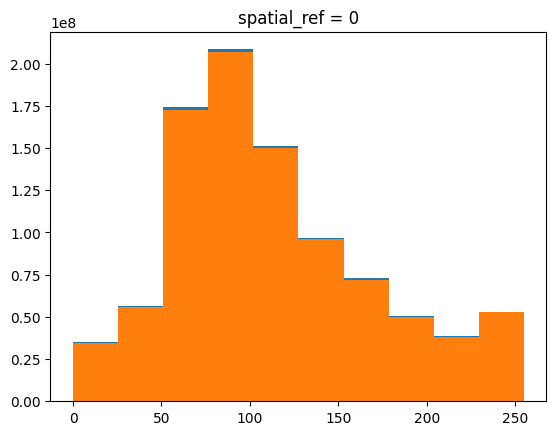

In [ ]:
%pip install rioxarray
import rioxarray
import matplotlib.pyplot as plt

url = " https://github.com/opengeos/datasets/releases/download/raster/Libya-2023-09-13.tif"
load_ds = rioxarray.open_rasterio(url)
load_ds.rio.crs
reproject_ds= load_ds.rio.reproject("EPSG:4326")
print(reproject_ds.rio.crs)
reproject_ds.dims
reproject_ds.coords
load_ds.plot()
reproject_ds.plot()

## Exercise 8: Clip the Raster Using a Bounding Box

1. Define a bounding box (e.g., `xmin`, `ymin`, `xmax`, `ymax`) that covers the land area of Libya.
2. Clip the raster dataset using this bounding box.
3. Plot the clipped data to visualize the result.

## Exercise 9: Mask the Raster Using a Vector Dataset

1. Load the GeoJSON file at https://github.com/opengeos/datasets/releases/download/raster/Derna_Libya.geojson using `geopandas`.
2. Use the GeoJSON to mask the reprojected raster dataset, keeping only the data within the GeoJSON boundaries.
3. Plot the masked raster data.

In [41]:
import geopandas as gpd
import rasterio
import matplotlib.pyplot as plt

url = "https://github.com/opengeos/datasets/releases/download/raster/Derna_Libya.geojson"
data = gpd.read_file(url)

raster_path = "path_to_your_raster_file.tif"  # Replace with the path to your raster file
with rasterio.open(raster_path) as src:
    # Reproject the GeoJSON to match the raster CRS
    geojson_data = geojson_data.to_crs(src.crs)

    # Convert the GeoJSON geometry to GeoJSON format for rasterio
    geojson_geom = [feature.__geo_interface__ for feature in geojson_data.geometry]

    # Mask the raster dataset using the GeoJSON boundaries
    masked_data, masked_transform = mask(src, geojson_geom, crop=True)

    # Copy metadata from the original raster
    masked_meta = src.meta.copy()
    masked_meta.update({
        "driver": "GTiff",
        "height": masked_data.shape[1],
        "width": masked_data.shape[2],
        "transform": masked_transform,
    })

# Step 3: Plot the masked raster data
plt.figure(figsize=(10, 8))
show(masked_data, transform=masked_transform, cmap="terrain")
plt.title("Masked Raster Data of Derna, Libya")
plt.show()

RasterioIOError: path_to_your_raster_file.tif: No such file or directory

## Exercise 10: Resample the Raster to a Different Resolution

1. Resample the raster dataset to a 3m resolution, using an average resampling method.
2. Check the new dimensions and coordinates after resampling.
3. Save the resampled raster dataset as a new GeoTIFF file.